<a href="https://colab.research.google.com/github/souzamichel/binarizacao/blob/main/binarizacao_dio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

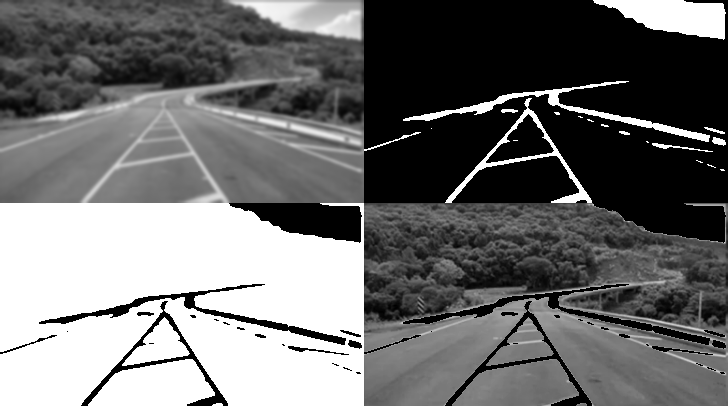

In [12]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# 1. Carrega a imagem (ajuste nome/caminho conforme seu arquivo)
img_orig = cv2.imread('ponte.PNG')
if img_orig is None:
    raise FileNotFoundError(
        "Não foi possível carregar 'ponte.PNG'. "
        "Verifique o nome e o diretório do arquivo."
    )

# 2. Converte para tons de cinza
gray = cv2.cvtColor(img_orig, cv2.COLOR_BGR2GRAY)

# 3. Aplica desfoque Gaussiano
blur = cv2.GaussianBlur(gray, (7, 7), 0)

# 4. Limiarizações
_, binary     = cv2.threshold(blur, 160, 255, cv2.THRESH_BINARY)
_, binary_inv = cv2.threshold(blur, 160, 255, cv2.THRESH_BINARY_INV)

# 5. Máscara usando o limiar inverso
masked_inv = cv2.bitwise_and(gray, gray, mask=binary_inv)

# 6. Montagem 2x2 com hstack e vstack (mantém array 2D)
row1    = np.hstack([blur,       binary])
row2    = np.hstack([binary_inv, masked_inv])
montage = np.vstack([row1, row2])

# 7. Exibe o resultado
cv2_imshow(montage)
cv2.waitKey(0)
cv2.destroyAllWindows()
